In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [2]:
df_India = pd.read_csv('Covid cases in India.csv')
dbd_India = pd.read_excel('per_day_cases.xlsx',sheet_name='India')
dbd_Italy = pd.read_excel('per_day_cases.xlsx',sheet_name='Italy')
dbd_Korea = pd.read_excel('per_day_cases.xlsx',sheet_name='Korea')

In [3]:
dbd_Korea.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-20,1,1,NaN
1,2020-01-21,1,0,NaN
2,2020-01-22,1,0,NaN
3,2020-01-23,1,0,NaN
4,2020-01-24,2,1,NaN


In [4]:
df_India.drop('S. No.', axis=1, inplace=True)

In [5]:
df_India.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured/Discharged/Migrated,Deaths
0,Andhra Pradesh,9,0,1,0
1,Bihar,4,0,0,1
2,Chattisgarh,1,0,0,0
3,Delhi,30,1,6,1
4,Gujarat,37,1,0,1


In [6]:
df_India['Total Cases'] = df_India['Total Confirmed cases ( Foreign National )'] + df_India['Total Confirmed cases (Indian National)']
df_India['Active Cases'] = df_India['Total Cases'] - df_India['Cured/Discharged/Migrated'] + df_India['Deaths']

In [7]:
df_India.drop(['Total Confirmed cases (Indian National)', 'Total Confirmed cases ( Foreign National )'],inplace=True, axis=1)

In [8]:
df_India.head()

,Name of State / UT,Cured/Discharged/Migrated,Deaths,Total Cases,Active Cases
0,Andhra Pradesh,1,0,9,8
1,Bihar,0,1,4,5
2,Chattisgarh,0,0,1,1
3,Delhi,6,1,31,26
4,Gujarat,0,1,38,39


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

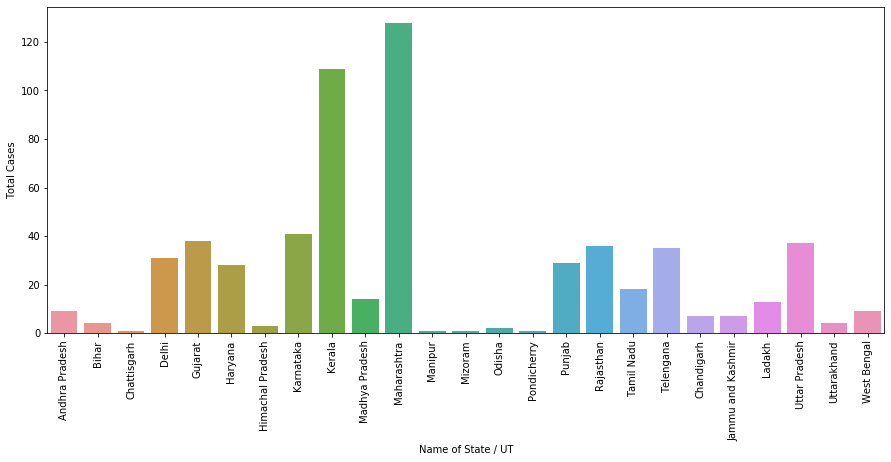

In [9]:
plt.figure(figsize=(15,6))
sns.barplot('Name of State / UT', 'Total Cases', data=df_India)
plt.xticks(rotation='vertical')

In [10]:
x = df_India.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False).to_frame()
x

,Active Cases
Name of State / UT,
Maharashtra,130
Kerala,105
Gujarat,39
Karnataka,39
Telengana,34
Rajasthan,33
Punjab,30
Uttar Pradesh,26
Delhi,26


In [11]:
df_India

,Name of State / UT,Cured/Discharged/Migrated,Deaths,Total Cases,Active Cases
0,Andhra Pradesh,1,0,9,8
1,Bihar,0,1,4,5
2,Chattisgarh,0,0,1,1
3,Delhi,6,1,31,26
4,Gujarat,0,1,38,39
5,Haryana,11,0,28,17
6,Himachal Pradesh,0,1,3,4
7,Karnataka,3,1,41,39
8,Kerala,4,0,109,105
9,Madhya Pradesh,0,0,14,14


In [12]:
df_India.head()

,Name of State / UT,Cured/Discharged/Migrated,Deaths,Total Cases,Active Cases
0,Andhra Pradesh,1,0,9,8
1,Bihar,0,1,4,5
2,Chattisgarh,0,0,1,1
3,Delhi,6,1,31,26
4,Gujarat,0,1,38,39


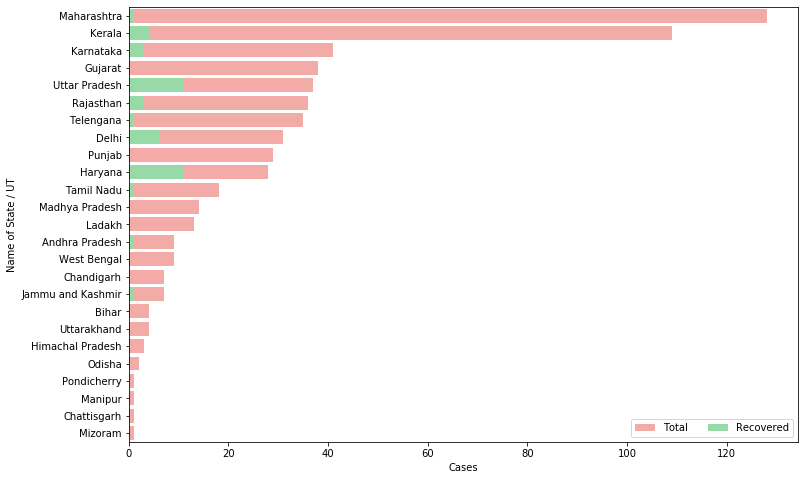

In [13]:
df_India.sort_values('Total Cases', inplace=True, ascending=False)
f, ax = plt.subplots(figsize=(12,8))
sns.set_color_codes("pastel")
sns.barplot('Total Cases', 'Name of State / UT', data=df_India, label='Total', color='r')
sns.barplot('Cured/Discharged/Migrated', 'Name of State / UT', data=df_India, label='Recovered', color='g')
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlabel='Cases')
plt.show()

C:\Users\yadav\Anaconda3\envs\ML\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



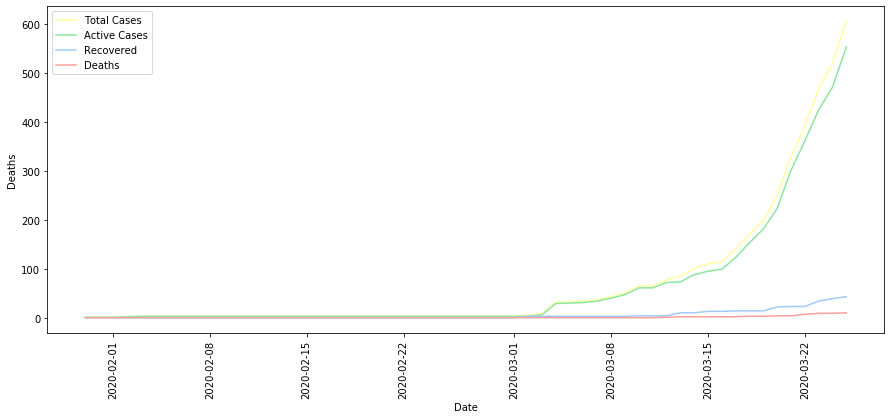

In [14]:
# Rise in COVID-19 cases in India
plt.figure(figsize=(15,6))
sns.lineplot('Date', 'Total Cases', data=dbd_India, label='Total Cases', color='y')
sns.lineplot('Date', 'Active', data=dbd_India, label='Active Cases', color='g')
sns.lineplot('Date', 'Recovered', data=dbd_India, label='Recovered', color='b')
sns.lineplot('Date', 'Deaths', data=dbd_India, label='Deaths', color='r')
plt.xticks(rotation='vertical')
plt.show()

Other countries covid cases

In [15]:
dbd_Italy.head()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-31,2,2,NaN
1,2020-02-01,2,0,NaN
2,2020-02-02,2,0,NaN
3,2020-02-03,2,0,NaN
4,2020-02-04,2,0,NaN


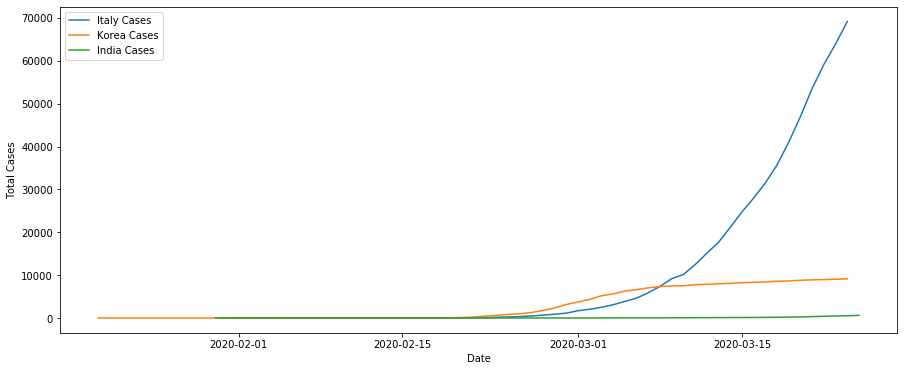

In [16]:
plt.figure(figsize=(15,6))
sns.lineplot('Date', 'Total Cases', data=dbd_Italy, label='Italy Cases')
sns.lineplot('Date', 'Total Cases', data=dbd_Korea, label='Korea Cases')
sns.lineplot('Date', 'Total Cases', data=dbd_India, label='India Cases')
plt.show()

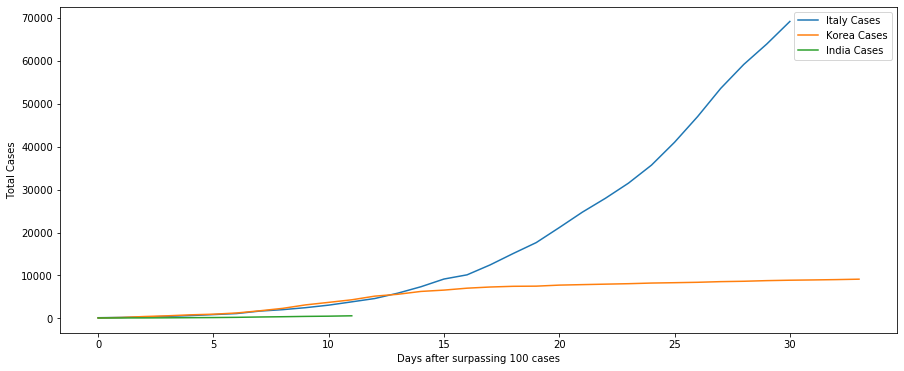

In [17]:
plt.figure(figsize=(15,6))
sns.lineplot('Days after surpassing 100 cases', 'Total Cases', data=dbd_Italy, label='Italy Cases')
sns.lineplot('Days after surpassing 100 cases', 'Total Cases', data=dbd_Korea, label='Korea Cases')
sns.lineplot('Days after surpassing 100 cases', 'Total Cases', data=dbd_India, label='India Cases')
plt.show()

In [18]:
testing_data = pd.read_csv('updated_data/ICMRTestingDetails.csv')

In [19]:
testing_data.head()

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Source
0,1,13/03/20 0:00,6500,5900,78,Press_Release_ICMR_13March2020.pdf
1,2,18/03/20 18:00,13125,12235,150,ICMR_website_update_18March_6PM_IST.pdf
2,3,19/03/20 10:00,13316,12426,168,ICMR_website_update_19March_10AM_IST_V2.pdf
3,4,19/03/20 18:00,14175,13285,182,ICMR_website_update_19March_6PM_IST.pdf
4,5,20/03/20 10:00,14376,13486,206,ICMR_website_update_20March_10AM_IST.pdf


In [29]:
px.scatter(testing_data, x='TotalIndividualsTested', y='TotalPositiveCases', range_x=[5900, 25000], range_y=[50, 600], 
       animation_frame='DateTime', size='TotalSamplesTested')

In [26]:
testing_data['TotalPositiveCases'].min()

78

In [35]:
def calcMortality(x):
    try:
        return (x['Deaths'] / x['Total Cases']) * 100
    except:
        return 0


dbd_India['mortality'] = dbd_India.apply(calcMortality, axis=1)
dbd_Italy['mortality'] = dbd_Italy.apply(calcMortality, axis=1)
dbd_Korea['mortality'] = dbd_Korea.apply(calcMortality, axis=1)

In [38]:
dbd_India

,Date,Total Cases,New Cases,Active,Recovered,Deaths,Days after surpassing 100 cases,mortality
0,2020-01-30,1,1,1,0,0,NaN,0.000000
1,2020-01-31,1,0,1,0,0,NaN,0.000000
2,2020-02-01,1,0,1,0,0,NaN,0.000000
3,2020-02-02,2,1,2,0,0,NaN,0.000000
4,2020-02-03,3,1,3,0,0,NaN,0.000000
5,2020-02-04,3,0,3,0,0,NaN,0.000000
6,2020-02-05,3,0,3,0,0,NaN,0.000000
7,2020-02-06,3,0,3,0,0,NaN,0.000000
8,2020-02-07,3,0,3,0,0,NaN,0.000000
9,2020-02-08,3,0,3,0,0,NaN,0.000000
